In [2]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from scipy import stats
from rdkit.Chem import rdMolDescriptors as rdmd
from rdkit.Chem.Scaffolds import MurckoScaffold
import pandas as pd
from tqdm import tqdm
import time
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef,confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

In [3]:
broad_data = pd.read_csv("./assaydata_270.csv") 
broad_data

,smiles,1_1,10_19,10_20,100_277,100_278,104_291,105_355,105_369,105_361,...,88_252,88_254,89_255,9_14,9_17,9_18,90_256,91_257,92_258,93_259
0,CCOC(=O)c1ccc(NC(=S)N2CCSC2c2ccc(OC)cc2)cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O=C(CC1NC(=O)NC1=O)Nc1cccc2ccccc12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CC(Nc1nc(nc2ccccc12)N1CCCC1)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CCCC(Oc1ccc(Br)cc1)c1nc2c3cc(OC)c(OC)cc3nc(S)n2n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CC1=C(C(NC(=O)N1)c1ccc(F)cc1)C(=O)OCc1ccc2OCOc2c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16165,COC(=O)[C@H]1[C@H](CO)[C@H]2Cn3c(=O)c(\C=C\C)c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16166,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@H](N(C)[C@@H]...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16167,C\C=C\c1ccc2n(C[C@@H]3[C@@H](CO)[C@@H](N(C)[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16168,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@@H](C(=O)N[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import pandas as pd
from rdkit.Chem import inchi
from rdkit import Chem

def make_StdInChI_from_SMILES(value):
    try: return Chem.MolToInchi(Chem.MolFromSmiles(value))
    except: return "Cannot_do"
    
from pandarallel import pandarallel
pandarallel.initialize()

broad_data['InChICode_standardised']= broad_data['smiles'].parallel_apply(make_StdInChI_from_SMILES)  

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefin

RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitted undefined stereo
RDKit WARNING: [13:16:27] WARNING: Omitt

In [5]:
#import standardize smiles from the package molvs
from molvs import standardize_smiles
import pandas as pd
from rdkit.Chem import inchi
from rdkit import Chem
import cirpy

def standardized_smiles_from_inchi(value):
    #print(value)
    try: return standardize_smiles(Chem.MolToSmiles(Chem.MolFromInchi(value)))
    except: return "Cannot_do"
    

from pandarallel import pandarallel
pandarallel.initialize()
broad_data['smiles_r']=broad_data['InChICode_standardised'].parallel_apply(standardized_smiles_from_inchi)  


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [6]:
broad_data = broad_data[broad_data["smiles_r"]!="Cannot_do"]
broad_data

,smiles,1_1,10_19,10_20,100_277,100_278,104_291,105_355,105_369,105_361,...,89_255,9_14,9_17,9_18,90_256,91_257,92_258,93_259,InChICode_standardised,smiles_r
0,CCOC(=O)c1ccc(NC(=S)N2CCSC2c2ccc(OC)cc2)cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C20H22N2O3S2/c1-3-25-19(23)15-4-8-16(...,CCOC(=O)c1ccc(NC(=S)N2CCSC2c2ccc(OC)cc2)cc1
1,O=C(CC1NC(=O)NC1=O)Nc1cccc2ccccc12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C15H13N3O3/c19-13(8-12-14(20)18-15(21...,OC(CC1N=C(O)N=C1O)=Nc1cccc2ccccc12
2,CC(Nc1nc(nc2ccccc12)N1CCCC1)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C20H22N4/c1-15(16-9-3-2-4-10-16)21-19...,CC(N=c1[nH]c(N2CCCC2)nc2ccccc12)c1ccccc1
3,CCCC(Oc1ccc(Br)cc1)c1nc2c3cc(OC)c(OC)cc3nc(S)n2n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C21H21BrN4O3S/c1-4-5-16(29-13-8-6-12(...,CCCC(Oc1ccc(Br)cc1)c1nc2c3cc(OC)c(OC)cc3nc(S)n2n1
4,CC1=C(C(NC(=O)N1)c1ccc(F)cc1)C(=O)OCc1ccc2OCOc2c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C20H17FN2O5/c1-11-17(18(23-20(25)22-1...,CC1=C(C(=O)OCc2ccc3c(c2)OCO3)C(c2ccc(F)cc2)NC(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16165,COC(=O)[C@H]1[C@H](CO)[C@H]2Cn3c(=O)c(\C=C\C)c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/2C24H28N2O4/c2*1-3-7-17-10-11-20-21-1...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(CCc2ccccc2)...
16166,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@H](N(C)[C@@H]...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...
16167,C\C=C\c1ccc2n(C[C@@H]3[C@@H](CO)[C@@H](N(C)[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(C)[C@@H](C(...
16168,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@@H](C(=O)N[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/2C28H29N5O4/c2*1-3-7-19-10-11-23-24-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(O)...


In [18]:
assay_list = broad_data.columns.to_list()[1:-2]
len(assay_list)

270

In [27]:
length = []
assay_list_filtered=[]    

for assay in assay_list:

    print("Assay ", assay )
    df_assay= broad_data[pd.notnull(broad_data[assay])]

    print("Total Compounds ", len(df_assay) )

    df_assay_inactive = df_assay[df_assay[assay] == 0]
    inactives_n=len(df_assay_inactive)
    print("Inactive Compounds ", inactives_n)

    df_assay_active = df_assay[df_assay[assay] == 1]
    actives_n=len(df_assay_active)
    print("Active Compounds ", actives_n)

    if(inactives_n > 3*actives_n):
        df_assay_inactive= df_assay_inactive.sample(3*actives_n, random_state=1)
        print("Inactive Compounds (after Undersamplimg) ", len(df_assay_inactive) )
        df_assay= df_assay_active.append(df_assay_inactive) 
        print("Total Compounds (after Undersamplimg) ", len(df_assay) )
        
    else:
        print("No Undersamplimg; Assay already in 1:3 ratio or less", len(df_assay) )

    if(len(df_assay)>=100):
        assay_list_filtered.append(assay)
    length.append(len(df_assay))

Assay  1_1
Total Compounds  100
Inactive Compounds  98
Active Compounds  2
Inactive Compounds (after Undersamplimg)  6
Total Compounds (after Undersamplimg)  8
Assay  10_19
Total Compounds  77
Inactive Compounds  75
Active Compounds  2
Inactive Compounds (after Undersamplimg)  6
Total Compounds (after Undersamplimg)  8
Assay  10_20
Total Compounds  64
Inactive Compounds  61
Active Compounds  3
Inactive Compounds (after Undersamplimg)  9
Total Compounds (after Undersamplimg)  12
Assay  100_277
Total Compounds  43
Inactive Compounds  34
Active Compounds  9
Inactive Compounds (after Undersamplimg)  27
Total Compounds (after Undersamplimg)  36
Assay  100_278
Total Compounds  45
Inactive Compounds  29
Active Compounds  16
No Undersamplimg; Assay already in 1:3 ratio or less 45
Assay  104_291
Total Compounds  53
Inactive Compounds  43
Active Compounds  10
Inactive Compounds (after Undersamplimg)  30
Total Compounds (after Undersamplimg)  40
Assay  105_355
Total Compounds  53
Inactive Compoun

Inactive Compounds  39
Active Compounds  2
Inactive Compounds (after Undersamplimg)  6
Total Compounds (after Undersamplimg)  8
Assay  154_511
Total Compounds  41
Inactive Compounds  36
Active Compounds  5
Inactive Compounds (after Undersamplimg)  15
Total Compounds (after Undersamplimg)  20
Assay  16_27
Total Compounds  62
Inactive Compounds  49
Active Compounds  13
Inactive Compounds (after Undersamplimg)  39
Total Compounds (after Undersamplimg)  52
Assay  160_519
Total Compounds  187
Inactive Compounds  186
Active Compounds  1
Inactive Compounds (after Undersamplimg)  3
Total Compounds (after Undersamplimg)  4
Assay  167_539
Total Compounds  40
Inactive Compounds  36
Active Compounds  4
Inactive Compounds (after Undersamplimg)  12
Total Compounds (after Undersamplimg)  16
Assay  167_538
Total Compounds  40
Inactive Compounds  36
Active Compounds  4
Inactive Compounds (after Undersamplimg)  12
Total Compounds (after Undersamplimg)  16
Assay  168_541
Total Compounds  96
Inactive Comp

Total Compounds  11043
Inactive Compounds  10770
Active Compounds  273
Inactive Compounds (after Undersamplimg)  819
Total Compounds (after Undersamplimg)  1092
Assay  221_693
Total Compounds  15337
Inactive Compounds  14906
Active Compounds  431
Inactive Compounds (after Undersamplimg)  1293
Total Compounds (after Undersamplimg)  1724
Assay  223_695
Total Compounds  1914
Inactive Compounds  1882
Active Compounds  32
Inactive Compounds (after Undersamplimg)  96
Total Compounds (after Undersamplimg)  128
Assay  224_696
Total Compounds  2232
Inactive Compounds  2133
Active Compounds  99
Inactive Compounds (after Undersamplimg)  297
Total Compounds (after Undersamplimg)  396
Assay  225_697
Total Compounds  1811
Inactive Compounds  1798
Active Compounds  13
Inactive Compounds (after Undersamplimg)  39
Total Compounds (after Undersamplimg)  52
Assay  227_699
Total Compounds  2190
Inactive Compounds  2168
Active Compounds  22
Inactive Compounds (after Undersamplimg)  66
Total Compounds (afte

Total Compounds  8551
Inactive Compounds  8324
Active Compounds  227
Inactive Compounds (after Undersamplimg)  681
Total Compounds (after Undersamplimg)  908
Assay  268_746
Total Compounds  12354
Inactive Compounds  11957
Active Compounds  397
Inactive Compounds (after Undersamplimg)  1191
Total Compounds (after Undersamplimg)  1588
Assay  269_747
Total Compounds  15076
Inactive Compounds  14470
Active Compounds  606
Inactive Compounds (after Undersamplimg)  1818
Total Compounds (after Undersamplimg)  2424
Assay  27_38
Total Compounds  86
Inactive Compounds  44
Active Compounds  42
No Undersamplimg; Assay already in 1:3 ratio or less 86
Assay  27_39
Total Compounds  86
Inactive Compounds  63
Active Compounds  23
No Undersamplimg; Assay already in 1:3 ratio or less 86
Assay  27_40
Total Compounds  64
Inactive Compounds  63
Active Compounds  1
Inactive Compounds (after Undersamplimg)  3
Total Compounds (after Undersamplimg)  4
Assay  270_748
Total Compounds  14421
Inactive Compounds  143

In [28]:
broad_data_filtered=broad_data[["InChICode_standardised", "smiles_r"]+assay_list_filtered]
broad_data_filtered = broad_data_filtered.dropna(subset=broad_data_filtered.columns.to_list()[1:], how="all", axis=0)
broad_data_filtered


,InChICode_standardised,smiles_r,178_684,180_686,183_604,184_606,185_665,185_666,186_668,190_628,...,273_751,274_752,275_753,275_754,276_755,278_757,279_758,280_759,283_762,93_259
0,InChI=1S/C20H22N2O3S2/c1-3-25-19(23)15-4-8-16(...,CCOC(=O)c1ccc(NC(=S)N2CCSC2c2ccc(OC)cc2)cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,InChI=1S/C15H13N3O3/c19-13(8-12-14(20)18-15(21...,OC(CC1N=C(O)N=C1O)=Nc1cccc2ccccc12,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,InChI=1S/C20H22N4/c1-15(16-9-3-2-4-10-16)21-19...,CC(N=c1[nH]c(N2CCCC2)nc2ccccc12)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,InChI=1S/C21H21BrN4O3S/c1-4-5-16(29-13-8-6-12(...,CCCC(Oc1ccc(Br)cc1)c1nc2c3cc(OC)c(OC)cc3nc(S)n2n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,InChI=1S/C20H17FN2O5/c1-11-17(18(23-20(25)22-1...,CC1=C(C(=O)OCc2ccc3c(c2)OCO3)C(c2ccc(F)cc2)NC(...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16165,InChI=1S/2C24H28N2O4/c2*1-3-7-17-10-11-20-21-1...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(CCc2ccccc2)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN
16166,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
16167,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(C)[C@@H](C(...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN
16168,InChI=1S/2C28H29N5O4/c2*1-3-7-19-10-11-23-24-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(O)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN


In [30]:
broad_data_filtered.to_csv("broad_data_filtered_89_inchi.csv", index=False)

In [31]:
not_to_be_selected_list=["Nuclei_Correlation_Manders_AGP_DNA",
            "Nuclei_Correlation_Manders_AGP_ER",
            "Nuclei_Correlation_Manders_AGP_Mito",
            "Nuclei_Correlation_Manders_AGP_RNA",
            "Nuclei_Correlation_Manders_DNA_AGP",
            "Nuclei_Correlation_Manders_DNA_ER",
            "Nuclei_Correlation_Manders_DNA_Mito",
            "Nuclei_Correlation_Manders_DNA_RNA",
            "Nuclei_Correlation_Manders_ER_AGP",
            "Nuclei_Correlation_Manders_ER_DNA",
            "Nuclei_Correlation_Manders_ER_Mito",
            "Nuclei_Correlation_Manders_ER_RNA",
            "Nuclei_Correlation_Manders_Mito_AGP",
            "Nuclei_Correlation_Manders_Mito_DNA",
            "Nuclei_Correlation_Manders_Mito_ER",
            "Nuclei_Correlation_Manders_Mito_RNA",
            "Nuclei_Correlation_Manders_RNA_AGP",
            "Nuclei_Correlation_Manders_RNA_DNA",
            "Nuclei_Correlation_Manders_RNA_ER",
            "Nuclei_Correlation_Manders_RNA_Mito",
            "Nuclei_Correlation_RWC_AGP_DNA",
            "Nuclei_Correlation_RWC_AGP_ER",
            "Nuclei_Correlation_RWC_AGP_Mito",
            "Nuclei_Correlation_RWC_AGP_RNA",
            "Nuclei_Correlation_RWC_DNA_AGP",
            "Nuclei_Correlation_RWC_DNA_ER",
            "Nuclei_Correlation_RWC_DNA_Mito",
            "Nuclei_Correlation_RWC_DNA_RNA",
            "Nuclei_Correlation_RWC_ER_AGP",
            "Nuclei_Correlation_RWC_ER_DNA",
            "Nuclei_Correlation_RWC_ER_Mito",
            "Nuclei_Correlation_RWC_ER_RNA",
            "Nuclei_Correlation_RWC_Mito_AGP",
            "Nuclei_Correlation_RWC_Mito_DNA",
            "Nuclei_Correlation_RWC_Mito_ER",
            "Nuclei_Correlation_RWC_Mito_RNA",
            "Nuclei_Correlation_RWC_RNA_AGP",
            "Nuclei_Correlation_RWC_RNA_DNA",
            "Nuclei_Correlation_RWC_RNA_ER",
            "Nuclei_Correlation_RWC_RNA_Mito",
            "Nuclei_Granularity_14_AGP",
            "Nuclei_Granularity_14_DNA",
            "Nuclei_Granularity_14_ER",
            "Nuclei_Granularity_14_Mito",
            "Nuclei_Granularity_14_RNA",
            "Nuclei_Granularity_15_AGP",
            "Nuclei_Granularity_15_DNA",
            "Nuclei_Granularity_15_ER",
            "Nuclei_Granularity_15_Mito",
            "Nuclei_Granularity_15_RNA",
            "Nuclei_Granularity_16_AGP",
            "Nuclei_Granularity_16_DNA",
            "Nuclei_Granularity_16_ER",
            "Nuclei_Granularity_16_Mito",
            "Nuclei_Granularity_16_RNA"]

In [32]:
cp = pd.read_csv("../../../Mitochondiral_Toxicity/Cell_Painting_Median_Features_Median_doses.csv" , usecols=lambda x: x not in not_to_be_selected_list) 
cp=cp.drop('index', axis=1)
cp

,InChICode_standardised,Metadata_mmoles_per_liter,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_EulerNumber,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,...,Nuclei_Texture_Variance_DNA_5_0,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0
0,InChI=1S/C12H15N3O2S/c1-7(2)18-8-4-5-9-10(6-8)...,5.000000,1728.953125,-1.375000,-25.445312,-0.067918,-0.062396,0.0,0.026443,0.038767,...,-0.218573,0.314918,0.222859,0.280258,0.192997,0.144917,0.168085,-0.332871,-0.314733,-0.313477
1,InChI=1S/C12H18N4O3/c1-7(2)5-16-10-9(11(17)15(...,5.000000,-272.074219,11.464844,-1.628906,-0.001808,-0.006674,0.0,-0.001405,-0.008796,...,-0.135188,0.023860,-0.016903,-0.017773,-0.028029,-0.038308,-0.041455,-0.070389,-0.067789,-0.071673
2,InChI=1S/C16H29N5O3/c1-12-9-20(13(2)10-22)16(2...,4.973595,101.958984,15.673828,-2.314453,0.010687,0.013397,0.0,-0.003746,0.010680,...,0.015253,-0.014119,0.035703,0.016875,-0.039304,-0.070028,-0.062892,-0.015647,-0.038908,-0.026464
3,InChI=1S/C16H29N5O3/c1-12-9-20(13(2)10-22)16(2...,4.912934,-109.708984,-10.203125,1.718750,0.025025,0.014627,0.0,-0.007164,-0.005632,...,-0.040388,0.046218,0.031759,0.037029,-0.051411,-0.083061,-0.071562,-0.024598,-0.052021,-0.043327
4,InChI=1S/C16H29N5O3/c1-12-9-20(13(2)10-22)16(2...,5.012874,-234.222656,8.873047,3.308594,0.010192,0.005251,0.0,-0.003173,0.005312,...,0.041850,-0.072889,-0.030955,-0.037623,-0.009460,0.004604,-0.010465,-0.031869,-0.025910,-0.014907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30399,InChI=1S/C9H9N5OS2/c10-12-8(16)11-6-3-1-2-5(4-...,5.000000,-226.027344,-18.847656,-0.511719,-0.005827,0.004864,0.0,0.003590,0.010464,...,-0.201503,-0.114357,-0.123664,-0.127474,-0.069665,-0.056972,-0.044186,-0.019668,-0.091541,-0.062515
30400,InChI=1S/C9H9NO/c11-6-7-5-10-9-4-2-1-3-8(7)9/h...,5.000000,254.769531,18.886719,-3.589844,0.027814,0.016943,0.0,-0.000781,-0.000637,...,-0.069652,-0.079942,-0.018155,-0.017759,-0.118369,-0.046322,-0.023926,0.033498,0.051214,0.016060
30401,InChI=1S/C9H9NO2/c10-8-3-1-2-7(6-8)4-5-9(11)12...,5.000000,238.574219,-0.699219,6.625000,0.005228,0.008800,0.0,0.002336,0.013308,...,0.042933,-0.107812,-0.107077,-0.138399,0.168811,0.216703,0.195851,-0.063656,-0.042877,-0.071681
30402,InChI=1S/C9H9NO3S/c1-6(11)5-14-8-3-2-7(4-10-8)...,5.000000,-238.945312,5.476562,0.089844,0.018032,0.012711,0.0,-0.004635,0.006730,...,0.081551,-0.070647,-0.095379,-0.102060,0.023423,0.049321,0.041996,0.023470,0.058959,0.065934


In [34]:
data = pd.merge(broad_data_filtered, cp )
data.to_csv("broad_data_filtered_89_CP.csv", index=False)

In [35]:
data

,InChICode_standardised,smiles_r,178_684,180_686,183_604,184_606,185_665,185_666,186_668,190_628,...,Nuclei_Texture_Variance_DNA_5_0,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0
0,InChI=1S/C20H22N2O3S2/c1-3-25-19(23)15-4-8-16(...,CCOC(=O)c1ccc(NC(=S)N2CCSC2c2ccc(OC)cc2)cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.154544,-0.017739,-0.060500,-0.053528,-0.067972,-0.140067,-0.113917,-0.218854,-0.142515,-0.141941
1,InChI=1S/C15H13N3O3/c19-13(8-12-14(20)18-15(21...,OC(CC1N=C(O)N=C1O)=Nc1cccc2ccccc12,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,...,-0.234417,-0.000956,-0.052132,-0.004901,0.147834,0.141230,0.117657,-0.127996,-0.081675,-0.109562
2,InChI=1S/C20H22N4/c1-15(16-9-3-2-4-10-16)21-19...,CC(N=c1[nH]c(N2CCCC2)nc2ccccc12)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.258245,-0.102372,-0.175780,-0.166038,-0.214411,-0.248387,-0.228980,-0.261781,-0.247254,-0.249148
3,InChI=1S/C21H21BrN4O3S/c1-4-5-16(29-13-8-6-12(...,CCCC(Oc1ccc(Br)cc1)c1nc2c3cc(OC)c(OC)cc3nc(S)n2n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.436172,-0.097931,-0.195951,-0.171660,-0.332383,-0.436751,-0.389166,0.047669,-0.064026,-0.040768
4,InChI=1S/C20H17FN2O5/c1-11-17(18(23-20(25)22-1...,CC1=C(C(=O)OCc2ccc3c(c2)OCO3)C(c2ccc(F)cc2)NC(...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.087383,0.298401,0.360107,0.319688,0.059659,0.068305,0.099614,-0.232806,-0.122837,-0.177712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16165,InChI=1S/2C24H28N2O4/c2*1-3-7-17-10-11-20-21-1...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(CCc2ccccc2)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.123289,-0.041496,-0.071582,-0.076322,-0.076398,-0.056708,-0.073490,-0.006674,-0.030616,-0.028721
16166,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.168468,-0.062467,-0.097009,-0.065424,0.014129,0.019922,0.019094,-0.048734,-0.018455,-0.032549
16167,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(C)[C@@H](C(...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.054902,-0.008725,0.048876,0.008480,-0.038521,-0.088137,-0.083024,-0.030230,-0.074643,-0.064762
16168,InChI=1S/2C28H29N5O4/c2*1-3-7-19-10-11-23-24-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(O)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.296377,-0.123216,0.057951,-0.024722,0.021086,0.024903,0.036363,-0.021521,-0.037658,-0.028768


In [36]:
CP_features_list= cp.columns.to_list()[2:-3]
assay_list= broad_data.columns.to_list()[1:]

In [37]:
def fp_as_DataStructs(mol):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    #arr = np.zeros((1,), np.int)
    #DataStructs.ConvertToNumpyArray(fp, arr)
    return fp

mol_list = [Chem.MolFromSmiles(x) for x in broad_data.smiles_r]
broad_data['Mol'] = mol_list
broad_data['fp'] = [fp_as_DataStructs(x) for x in broad_data.Mol]
broad_data

,smiles,1_1,10_19,10_20,100_277,100_278,104_291,105_355,105_369,105_361,...,9_17,9_18,90_256,91_257,92_258,93_259,InChICode_standardised,smiles_r,Mol,fp
0,CCOC(=O)c1ccc(NC(=S)N2CCSC2c2ccc(OC)cc2)cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C20H22N2O3S2/c1-3-25-19(23)15-4-8-16(...,CCOC(=O)c1ccc(NC(=S)N2CCSC2c2ccc(OC)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fe080b91b20>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,O=C(CC1NC(=O)NC1=O)Nc1cccc2ccccc12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C15H13N3O3/c19-13(8-12-14(20)18-15(21...,OC(CC1N=C(O)N=C1O)=Nc1cccc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x7fe080b91be0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CC(Nc1nc(nc2ccccc12)N1CCCC1)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C20H22N4/c1-15(16-9-3-2-4-10-16)21-19...,CC(N=c1[nH]c(N2CCCC2)nc2ccccc12)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7fe080b91d00>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CCCC(Oc1ccc(Br)cc1)c1nc2c3cc(OC)c(OC)cc3nc(S)n2n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C21H21BrN4O3S/c1-4-5-16(29-13-8-6-12(...,CCCC(Oc1ccc(Br)cc1)c1nc2c3cc(OC)c(OC)cc3nc(S)n2n1,<rdkit.Chem.rdchem.Mol object at 0x7fe080b91b80>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CC1=C(C(NC(=O)N1)c1ccc(F)cc1)C(=O)OCc1ccc2OCOc2c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C20H17FN2O5/c1-11-17(18(23-20(25)22-1...,CC1=C(C(=O)OCc2ccc3c(c2)OCO3)C(c2ccc(F)cc2)NC(...,<rdkit.Chem.rdchem.Mol object at 0x7fe080b91c40>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16165,COC(=O)[C@H]1[C@H](CO)[C@H]2Cn3c(=O)c(\C=C\C)c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/2C24H28N2O4/c2*1-3-7-17-10-11-20-21-1...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(CCc2ccccc2)...,<rdkit.Chem.rdchem.Mol object at 0x7fe077886e80>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16166,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@H](N(C)[C@@H]...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...,<rdkit.Chem.rdchem.Mol object at 0x7fe077886ee0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16167,C\C=C\c1ccc2n(C[C@@H]3[C@@H](CO)[C@@H](N(C)[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(C)[C@@H](C(...,<rdkit.Chem.rdchem.Mol object at 0x7fe077886f40>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16168,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@@H](C(=O)N[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/2C28H29N5O4/c2*1-3-7-19-10-11-23-24-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(O)...,<rdkit.Chem.rdchem.Mol object at 0x7fe077886fa0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [38]:
broad_data_compounds= broad_data_filtered[["smiles_r", "InChICode_standardised"]]
Ser_Mol = broad_data_compounds['smiles_r'].apply(Chem.MolFromSmiles)


In [39]:
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect

Morgan_fingerprint = Ser_Mol.apply(GetMorganFingerprintAsBitVect, args=(2, 2048))
Morganfingerprint_array  = np.stack(Morgan_fingerprint)

Morgan_collection  = []
for x in np.arange(Morganfingerprint_array.shape[1]): #np.arange plus rapide que range
    x = "Mfp"+str(x)
    Morgan_collection.append(x)

Morganfingerprint_table  = pd.DataFrame(Morganfingerprint_array , columns=Morgan_collection )
Morganfingerprint_table ['InChICode_standardised'] = broad_data['InChICode_standardised']

In [40]:
Morganfingerprint_table

,Mfp0,Mfp1,Mfp2,Mfp3,Mfp4,Mfp5,Mfp6,Mfp7,Mfp8,Mfp9,...,Mfp2039,Mfp2040,Mfp2041,Mfp2042,Mfp2043,Mfp2044,Mfp2045,Mfp2046,Mfp2047,InChICode_standardised
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C20H22N2O3S2/c1-3-25-19(23)15-4-8-16(...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C15H13N3O3/c19-13(8-12-14(20)18-15(21...
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C20H22N4/c1-15(16-9-3-2-4-10-16)21-19...
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C21H21BrN4O3S/c1-4-5-16(29-13-8-6-12(...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C20H17FN2O5/c1-11-17(18(23-20(25)22-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16165,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,InChI=1S/2C24H28N2O4/c2*1-3-7-17-10-11-20-21-1...
16166,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...
16167,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...
16168,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,InChI=1S/2C28H29N5O4/c2*1-3-7-19-10-11-23-24-2...


In [41]:
Morganfingerprint_table.to_csv("Mfp_all_bits_16170.csv", index=False)

In [42]:
from matplotlib import pyplot as plt

In [43]:
Morganfingerprint_table_trial= Morganfingerprint_table.iloc[:2, :-1]
Morganfingerprint_table_trial

,Mfp0,Mfp1,Mfp2,Mfp3,Mfp4,Mfp5,Mfp6,Mfp7,Mfp8,Mfp9,...,Mfp2038,Mfp2039,Mfp2040,Mfp2041,Mfp2042,Mfp2043,Mfp2044,Mfp2045,Mfp2046,Mfp2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
Morganfingerprint_table.iloc[:, :-1].T.sum()

0        51
1        36
2        40
3        53
4        52
         ..
16165    57
16166    61
16167    61
16168    70
16169    59
Length: 16170, dtype: int64

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


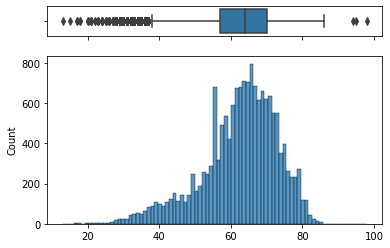

In [45]:
#Number of bits set per molecule
import seaborn as sns

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(Morganfingerprint_table.iloc[:, :-1].T.sum(), ax=ax_box)
sns.histplot(Morganfingerprint_table.iloc[:, :-1].T.sum(), ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [46]:
Morganfingerprint_table.iloc[:, :-1].sum().sort_values(ascending=False)

Mfp1873    15837
Mfp1380    15792
Mfp807     15263
Mfp1750    15075
Mfp1019    14605
           ...  
Mfp830         1
Mfp671         1
Mfp1115        0
Mfp1789        0
Mfp337         0
Length: 2048, dtype: int64

In [47]:
bits = bits= list(range(0, 2048, 1))
bits[-1]

2047

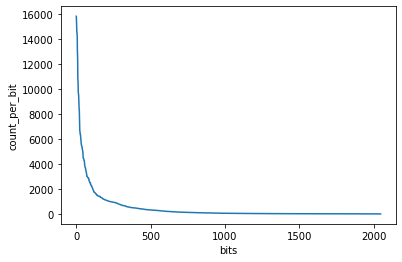

In [48]:
#Number of times each individual bit is set
#Number of bits set per molecule
import seaborn as sns

count_per_bit = Morganfingerprint_table.iloc[:, :-1].sum().sort_values(ascending=False).values
bits = bits= list(range(0, 2048, 1))

#create dataframe using two list days and temperature
bit_counts_df = pd.DataFrame({"count_per_bit":count_per_bit, "bits":bits})
 
# Draw line plot
sns.lineplot(y = "count_per_bit", x = "bits", data=bit_counts_df,)
plt.show() # to show graph



In [49]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

def fs_variance(df, threshold:float=0.05):
    """
    Return a list of selected variables based on the threshold.
    """

    # The list of columns in the data frame
    features = list(df.columns)
    
    # Initialize and fit the method
    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    # Get which column names which pass the threshold
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select

In [50]:
selected_Features = fs_variance(Morganfingerprint_table.iloc[:,:-1], threshold=0.05)

In [51]:
len(selected_Features)

273

In [52]:
new_Morganfingerprint_table= Morganfingerprint_table[selected_Features]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


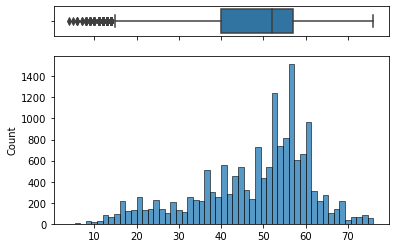

In [53]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(new_Morganfingerprint_table.iloc[:, :-1].T.sum(), ax=ax_box)
sns.histplot(new_Morganfingerprint_table.iloc[:, :-1].T.sum(), ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

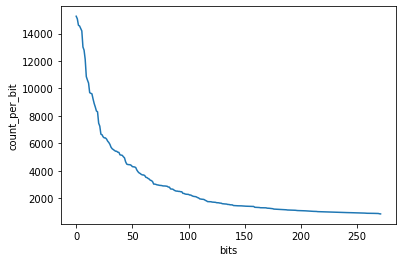

In [54]:
count_per_bit = new_Morganfingerprint_table.iloc[:, :-1].sum().sort_values(ascending=False).values
bits = bits= list(range(0, len(count_per_bit), 1))

#create dataframe using two list days and temperature
bit_counts_df = pd.DataFrame({"count_per_bit":count_per_bit, "bits":bits})
 
# Draw line plot
sns.lineplot(y = "count_per_bit", x = "bits", data=bit_counts_df,)
plt.show() # to show graph



In [55]:
new_Morganfingerprint_table["InChICode_standardised"]= Morganfingerprint_table["InChICode_standardised"]
new_Morganfingerprint_table

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Mfp1,Mfp2,Mfp12,Mfp14,Mfp16,Mfp25,Mfp29,Mfp66,Mfp80,Mfp90,...,Mfp1953,Mfp1978,Mfp1980,Mfp1985,Mfp2004,Mfp2009,Mfp2022,Mfp2040,Mfp2045,InChICode_standardised
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C20H22N2O3S2/c1-3-25-19(23)15-4-8-16(...
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C15H13N3O3/c19-13(8-12-14(20)18-15(21...
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C20H22N4/c1-15(16-9-3-2-4-10-16)21-19...
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C21H21BrN4O3S/c1-4-5-16(29-13-8-6-12(...
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,InChI=1S/C20H17FN2O5/c1-11-17(18(23-20(25)22-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16165,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,InChI=1S/2C24H28N2O4/c2*1-3-7-17-10-11-20-21-1...
16166,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...
16167,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...
16168,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,InChI=1S/2C28H29N5O4/c2*1-3-7-19-10-11-23-24-2...


In [57]:
new_Morganfingerprint_table.to_csv("Mfp_filtered_16170.csv", index=False)